> # Homework #1
This assignment deals with decision trees and their basic use using simple Python code.

In [1]:
# Various libraries used in this script
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import recall_score , f1_score

import warnings
warnings.filterwarnings('ignore')  # "error", "ignore", "always", "default", "module" or "once"

import pandas as pd
from matplotlib import pyplot as plt

## Lets define a function that is doing:


1.   Taking a dataset and creating a decision tree
2.   Fitting a model for this tree
3.   Calculating and return accuracy, precision, tree max depth, recall and f1 for a tree.

This function should also be able to get as arguments the cross validation (`cv`) number and the max depth (`md`) of the tree.



In [2]:

def analyze_ds(dataset , cv=10 , md = 80):

    # creating new tree cls
    cls = DecisionTreeClassifier()
    cls.max_depth = md

    # creating a model
    cls.fit(dataset.data , dataset.target)

    # clac accuracy
    ac =  cross_val_score(
        cls,
        dataset.data,
        dataset.target,
        scoring='accuracy',
        cv=cv
    )

    # clac precision
    pre =  cross_val_score(
        cls,
        dataset.data,
        dataset.target,
        scoring='precision_weighted',
        cv=cv
    )

    # make predictions with the data
    y_prd = cls.predict(dataset.data)

    # clac recall score
    rc = recall_score(dataset.target , y_prd ,average = "weighted", zero_division=0)

    # clac f1 score
    f1 = f1_score(dataset.target , y_prd , zero_division=0, average = "weighted")
   

    return round(ac.mean() , 3) , round(pre.mean() , 3) , cls.tree_.max_depth , rc , f1 

## The next function we need should be able to do a plot for:

1.   Any of the arguments given from the prev function vs any other argument.
2.   Use the keys for those arguments to mark the title and the axis names.


In [3]:
  
def my_plot(x_label : str , y_label : str , table : dict) -> None:    

    plt.plot(table[x_label] , table[y_label])
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(f"{y_label} vs {x_label}")
    plt.show()


We want to run this `analyze_ds()` function with a number of possible max depth. The next function:
1.  take a dataset and run the `analyze_ds()` on it with max depth from 1 to 10.
2.  adding the results to a table (python dictionary). 
3.  Printing the table on screen.
4.  ploting 4 diffrent graphs from the columns of the table. 
5.  It also finding the highest accuracy value in the column, and matching the max depth value for it and returns it.

In [4]:

def main(dataset):

    table = {"Accuracy":[] , "Precision": [], "Max Depth": [], "Recall Score": [] , "F1 score" : [] }

    for i in range(1,11):
        
        v_list = analyze_ds(dataset , md = i)

        table["Accuracy"].append(v_list[0])
        table["Precision"].append(v_list[1])
        table["Max Depth"].append(v_list[2])
        table["Recall Score"].append(v_list[3])
        table["F1 score"].append(v_list[4])

    df = pd.DataFrame(table)

    print(df.to_string(index=False))


    my_plot("Max Depth" , "Accuracy" , table)
    my_plot("Max Depth" , "Precision" , table)
    my_plot("Max Depth" , "Recall Score" , table)
    my_plot("Max Depth" , "F1 score" , table)

    # find the highest accuracy score and match to the best max depth
    best_ac = max(table["Accuracy"])
    best_ac_loc = table["Accuracy"].index(best_ac)
    best_md = table["Max Depth"][best_ac_loc]


    return best_md



Great, now lets apply the `main()` function to a dataset.
We can use any dataset from the `sklearn.datasets` lib and simply sending it to the function. For example:

 Accuracy  Precision  Max Depth  Recall Score  F1 score
    0.667      0.500          1      0.666667  0.555556
    0.947      0.955          2      0.960000  0.959936
    0.960      0.967          3      0.973333  0.973323
    0.960      0.959          4      0.993333  0.993333
    0.953      0.959          5      1.000000  1.000000
    0.953      0.964          5      1.000000  1.000000
    0.953      0.964          5      1.000000  1.000000
    0.953      0.959          5      1.000000  1.000000
    0.953      0.959          5      1.000000  1.000000
    0.960      0.964          5      1.000000  1.000000


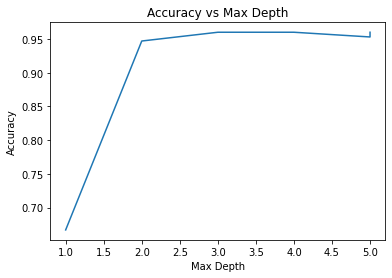

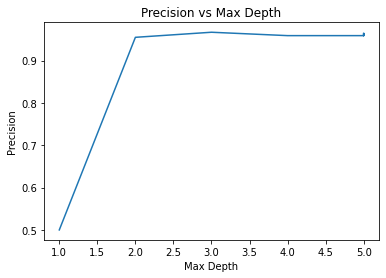

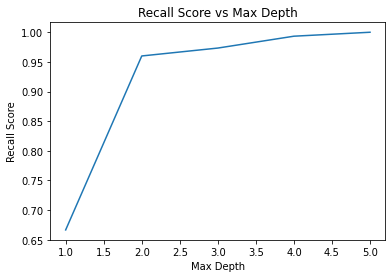

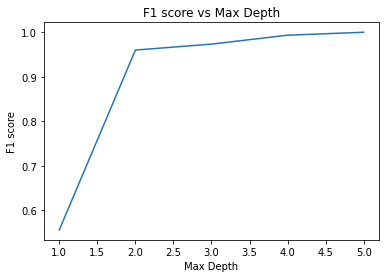

Best Max Depth:  3


In [5]:
# ! To check another option, simply change the load_iris() function to any other dataset
# from the sklearn library possible datasets.

best_max_depth = main(datasets.load_iris())
print("Best Max Depth: " , best_max_depth)

Now, lets write a basic loop to do the above in one go for the three datasets:

1.  Iris Datasets
2.  Wine Dataset
3.  Digits Dataset



 .. _iris_dataset: 


 Accuracy  Precision  Max Depth  Recall Score  F1 score
    0.667      0.500          1      0.666667  0.555556
    0.947      0.960          2      0.960000  0.959936
    0.960      0.967          3      0.973333  0.973323
    0.960      0.959          4      0.993333  0.993333
    0.960      0.959          5      1.000000  1.000000
    0.953      0.964          5      1.000000  1.000000
    0.953      0.959          5      1.000000  1.000000
    0.953      0.959          5      1.000000  1.000000
    0.953      0.959          5      1.000000  1.000000
    0.953      0.959          5      1.000000  1.000000


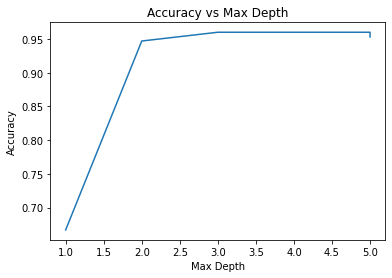

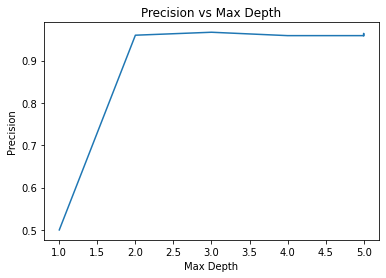

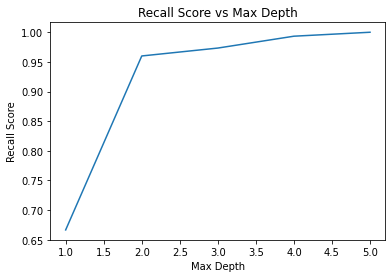

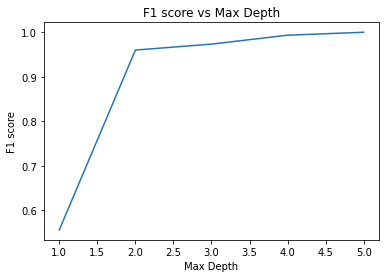

Best Max Depth:  3


 .. _wine_dataset: 


 Accuracy  Precision  Max Depth  Recall Score  F1 score
    0.620      0.498          1      0.696629  0.593571
    0.839      0.866          2      0.921348  0.921266
    0.866      0.894          3      0.977528  0.977587
    0.876      0.897          4      0.988764  0.988745
    0.871      0.862          5      1.000000  1.000000
    0.865      0.899          5      1.000000  1.000000
    0.876      0.903          5      1.000000  1.000000
    0.859      0.896          5      1.000000  1.000000
    0.865      0.859          5      1.000000  1.000000
    0.882      0.868          5      1.000000  1.000000


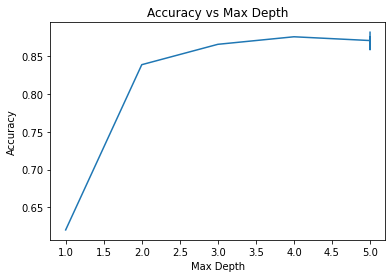

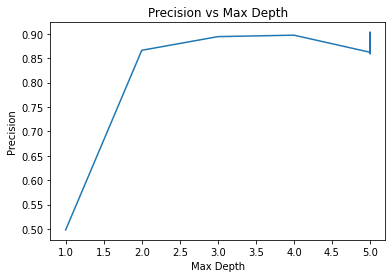

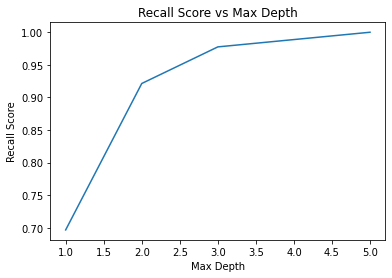

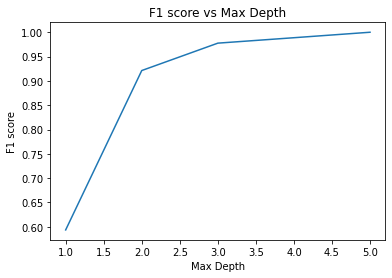

Best Max Depth:  5


 .. _digits_dataset: 


 Accuracy  Precision  Max Depth  Recall Score  F1 score
    0.198      0.077          1      0.198108  0.097729
    0.311      0.203          2      0.318865  0.216908
    0.459      0.404          3      0.488592  0.406523
    0.545      0.544          4      0.595437  0.554704
    0.639      0.701          5      0.707290  0.701675
    0.733      0.763          6      0.822482  0.820738
    0.790      0.802          7      0.891486  0.893391
    0.813      0.815          8      0.935448  0.935637
    0.820      0.838          9      0.962159  0.962321
    0.822      0.831         10      0.982193  0.982275


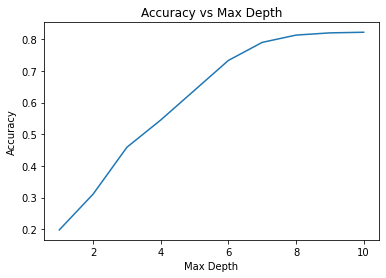

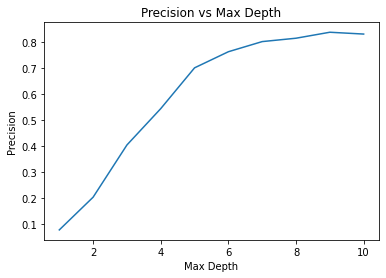

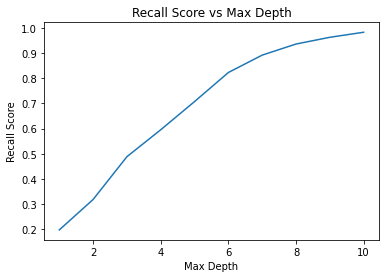

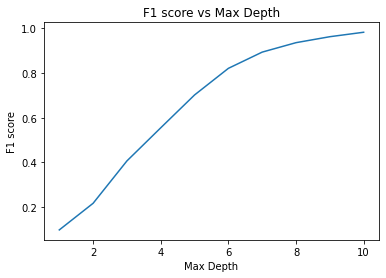

Best Max Depth:  10


In [7]:
dataset_list = [datasets.load_iris() , datasets.load_wine() , datasets.load_digits()]

for ds in dataset_list:

    # extracting the dataset name from it's description
    dataset_name = ds["DESCR"].split("\n")[0]
    print("\n\n", dataset_name , "\n\n")

    best_max_depth = main(ds)
    print("Best Max Depth: " , best_max_depth)